<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/Projeto_Integrador_Adriana_Torrezani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Integrador:
ETL com Google Colab e BigQuery



In [ ]:
import pandas as pd

In [ ]:
df_clientes = pd.read_csv('https://docs.google.com/spreadsheets/d/1Z8lv-BuFb4mSlOCGw4AKGvXA5B0y_4xZQ_ahYNArOso/export?format=csv')
df_clientes.head(5)

,cliente_id,nome,email,data_nascimento,genero,estado
0,1,Ana Sophia Araújo,levicunha@ig.com.br,1961-03-08,Masculino,BA
1,2,Sarah Viana,bazevedo@da.com,1992-05-26,Masculino,RJ
2,3,Theo Viana,ana-liviafreitas@gmail.com,2005-11-05,Outro,RJ
3,4,Samuel Pereira,henrique35@gmail.com,1960-07-09,Masculino,SP
4,5,Ana Luiza Moraes,bryan78@gmail.com,1979-12-20,Masculino,CE


In [ ]:
# URL do arquivo CSV
url_pedidos = "https://docs.google.com/spreadsheets/d/1EGBfkBMJ23rOJDqem4vHZVszBEdyadjFaDvRvdqDPeo/export?format=csv"

# Carregar os dados com tratamento de erros
try:
    df_pedidos = pd.read_csv(url_pedidos, encoding="utf-8", sep=",")
    print("Dados de pedidos carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar os dados de pedidos: {e}")

# Exibir as primeiras 5 linhas
display(df_pedidos.head())


Dados de pedidos carregados com sucesso!


,pedido_id,cliente_id,data_pedido,valor_total,status
0,1,31,2024-01-07,302.33,Finalizado
1,2,86,2023-11-18,663.23,Cancelado
2,3,41,2024-07-16,932.57,Finalizado
3,4,2,2024-09-26,485.37,Em Processamento
4,5,13,2025-02-04,119.60,Finalizado


In [ ]:
import pandas as pd

# URL do arquivo CSV
url_pagamentos = "https://docs.google.com/spreadsheets/d/1uxlZl8MgddVIQJZjGOuEQdikBWL9rG3Tas7xXIv9U2E/export?format=csv"

# Carregar os dados com tratamento de erros
try:
    df_pagamentos = pd.read_csv(url_pagamentos, encoding="utf-8", sep=",")
    print("Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

# Exibir as primeiras 5 linhas
display(df_pagamentos.head(5))


Dados carregados com sucesso!


,pagamento_id,pedido_id,metodo_pagamento,valor_pago,data_pagamento
0,1,1,Pix,302.33,2024-03-17
1,2,2,Boleto,663.23,2024-09-19
2,3,3,Boleto,33.46,2024-07-21
3,4,4,Pix,485.37,2024-11-16
4,5,5,Cartão de Crédito,119.60,2025-03-02


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cliente_id       100 non-null    int64 
 1   nome             100 non-null    object
 2   email            99 non-null     object
 3   data_nascimento  100 non-null    object
 4   genero           100 non-null    object
 5   estado           100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [ ]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pedido_id    200 non-null    int64  
 1   cliente_id   200 non-null    int64  
 2   data_pedido  200 non-null    object 
 3   valor_total  200 non-null    float64
 4   status       200 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [ ]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pagamento_id      200 non-null    int64  
 1   pedido_id         200 non-null    int64  
 2   metodo_pagamento  200 non-null    object 
 3   valor_pago        200 non-null    float64
 4   data_pagamento    200 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [ ]:
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], errors='coerce')
df_pedidos['data_pedido'] = pd.to_datetime(df_pedidos['data_pedido'], errors='coerce')
df_pagamentos['data_pagamento'] = pd.to_datetime(df_pagamentos['data_pagamento'], errors='coerce')
df_pedidos['valor_total'] = pd.to_numeric(df_pedidos['valor_total'], errors='coerce')
df_pagamentos['valor_pago'] = pd.to_numeric(df_pagamentos['valor_pago'], errors='coerce')

In [ ]:
print(df_clientes.isnull().sum())
print(df_pedidos.isnull().sum())
print(df_pagamentos.isnull().sum())

cliente_id         0
nome               0
email              1
data_nascimento    0
genero             0
estado             0
dtype: int64
pedido_id      0
cliente_id     0
data_pedido    0
valor_total    0
status         0
dtype: int64
pagamento_id        0
pedido_id           0
metodo_pagamento    0
valor_pago          0
data_pagamento      0
dtype: int64


In [ ]:
df_pedidos.info() #Convertidos valores numéricos e data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pedido_id    200 non-null    int64         
 1   cliente_id   200 non-null    int64         
 2   data_pedido  200 non-null    datetime64[ns]
 3   valor_total  200 non-null    float64       
 4   status       200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
df_clientes.head(5)

,cliente_id,nome,email,data_nascimento,genero,estado
0,1,Ana Sophia Araújo,levicunha@ig.com.br,1961-03-08,Masculino,BA
1,2,Sarah Viana,bazevedo@da.com,1992-05-26,Masculino,RJ
2,3,Theo Viana,ana-liviafreitas@gmail.com,2005-11-05,Outro,RJ
3,4,Samuel Pereira,henrique35@gmail.com,1960-07-09,Masculino,SP
4,5,Ana Luiza Moraes,bryan78@gmail.com,1979-12-20,Masculino,CE


In [ ]:
!pip install --upgrade google-cloud-bigquery

In [ ]:
# Importar bibliotecas
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
from pandas_gbq import to_gbq

# Autenticar usuário
auth.authenticate_user()

# Definir o ID do projeto
project_id = 'omega-signifier-454016-c4'

# Criar cliente do BigQuery
client = bigquery.Client(project=project_id)

# Definir o dataset
dataset_id = 'Projeto_integradorat'

# Enviar cada DataFrame para o BigQuery individualmente
tabelas = {
    "clientes": df_clientes,
    "pedidos": df_pedidos,
    "pagamentos": df_pagamentos
}

for nome_tabela, df in tabelas.items():
    to_gbq(
        dataframe=df,
        destination_table=f"{dataset_id}.{nome_tabela}",
        project_id=project_id,
        if_exists="replace"  # Substituir se a tabela já existir
    )
    print(f"Tabela {nome_tabela} enviada com sucesso.")


100%|██████████| 1/1 [00:00<00:00, 1784.81it/s]


Tabela clientes enviada com sucesso.


100%|██████████| 1/1 [00:00<00:00, 2423.05it/s]


Tabela pedidos enviada com sucesso.


100%|██████████| 1/1 [00:00<00:00, 2343.19it/s]

Tabela pagamentos enviada com sucesso.


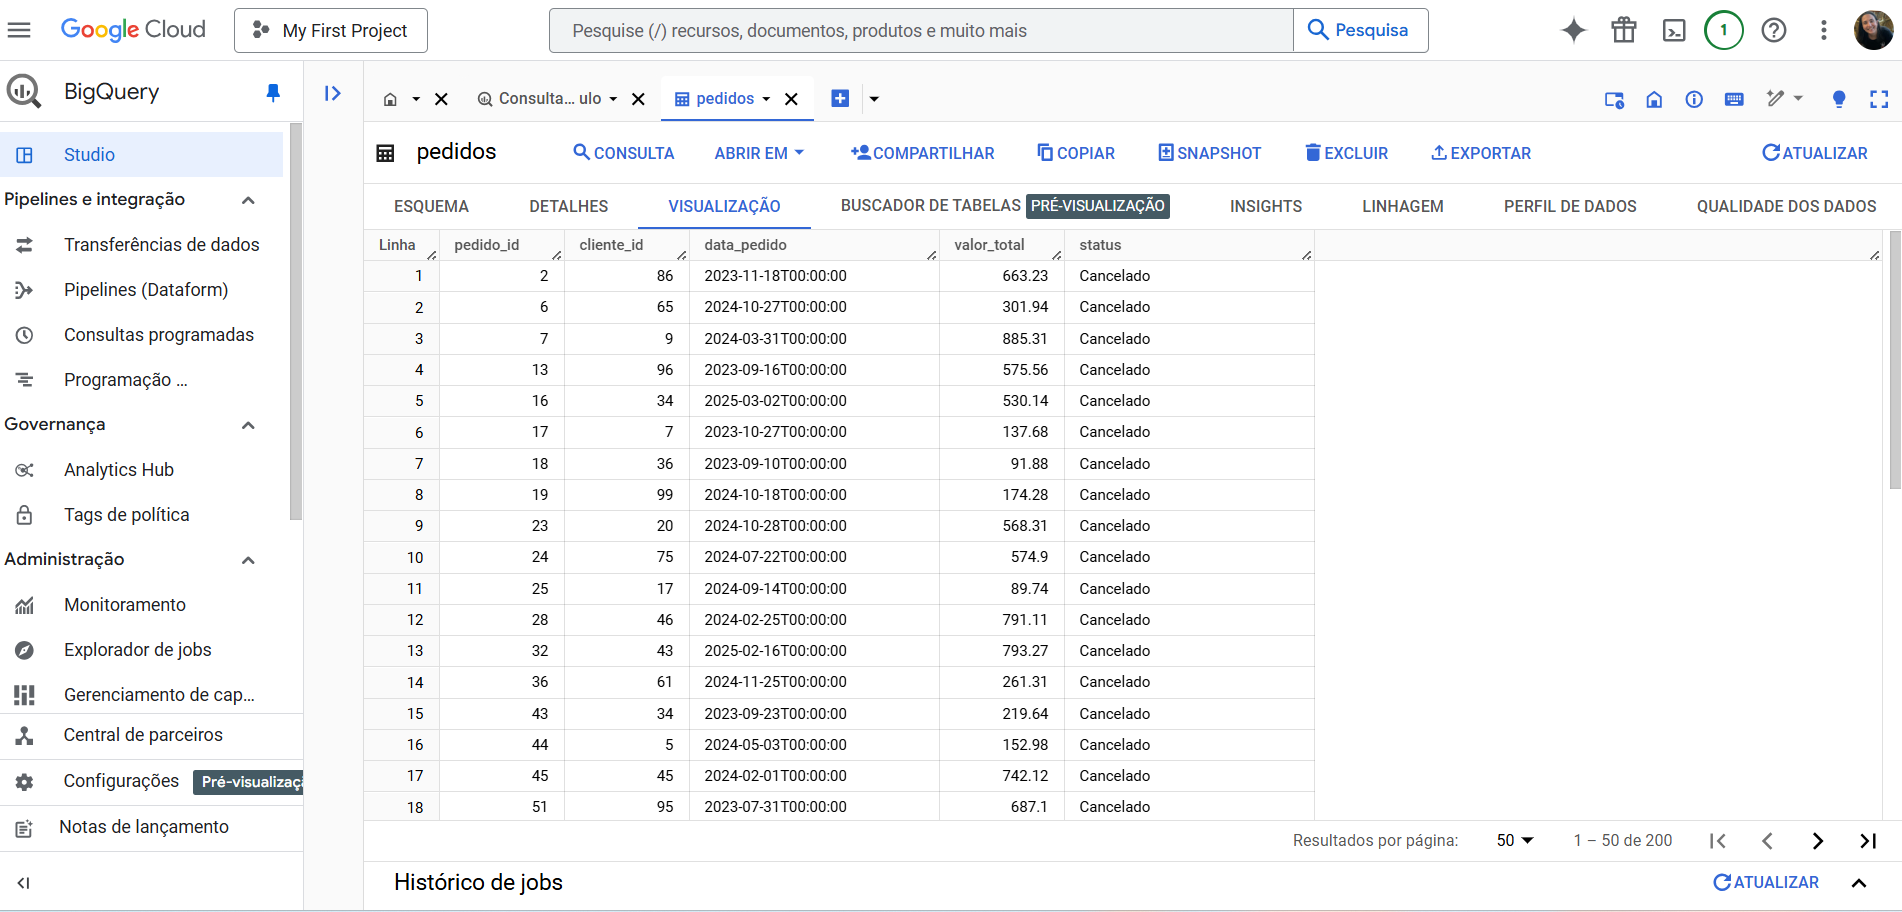


A pipeline de ETL foi desenvolvida para unificar e organizar os dados de clientes, pedidos e pagamentos. Primeiramente, as colunas de datas foram convertidas para o formato adequado. Em seguida, duplicatas foram removidas com base em identificadores únicos. Valores nulos foram tratados para evitar inconsistências nos dados. Os campos categóricos, como gênero e status, foram padronizados para manter uniformidade. Além disso, foi garantida a integridade referencial entre as tabelas, relacionando clientes aos seus pedidos e pagamentos. Após a transformação, os dados foram carregados no Google BigQuery. Isso permite análises eficientes e facilita a tomada de decisões estratégicas no e-commerce.